# Main Code 

##                                                               __FCM Problem__

### Needed Packages

In [1]:
from matplotlib import pyplot as plt
from textwrap import wrap
from fcmeans import FCM
import numpy as np
import cv2

### Functions Implementation

##### Change Color Space

In [2]:
def change_color_space(img, color_space):
    '''
    Function that convert RGB image into different Color Spaces
    Input: 
          - img: input image
          - color_space: color space to be converted to
    Output:
          - converted image or same image if it's not rgb or if there is no color space sent as a parameter to the function
    '''
    if IMAGE_SHAPE_LENGHT == 3 and color_space != None:
        img = cv2.cvtColor(img, eval(color_space))
        return img #cv2.COLOR_RGB2LAB    
    return img

##### Reshape Image

In [3]:
def reshape_img(img):
    '''
    Function that reshapes the image to convert each pixel to an instance of a data set
    Input: 
          - img: input image
          - color_space: color space to be converted to
    Output:
          - reshaped image
    '''
    image = img
    if len(image.shape) == 3:
        image = img.reshape((COLUMN*ROW, 3))
    else:
        image = img.reshape((COLUMN*ROW, 1))
    return image

##### Create & Fit the FCM Model

In [4]:
def create_model(img, n_clusters=4):
    '''
    Function that build the Fuzzy C-Means Model and fit the data to model
    Input:
          - img: input image data
          - n_clusters: number of clusters to do segmentation
    Output:
          - return FCM Model
    '''
    fcm = FCM(n_clusters=n_clusters)  # Different Number of clusters
    fcm.fit(img)
    return fcm

##### Image Segmentation

In [5]:
def pixel_quantization(fcm, img):
    '''
    Function to do clustering by predicting the clustered image by using trained fcm model 
    Input:
          - img: input image data
          - fcm: FCM Segemenation Model
    Output:
          - return clustered images, centeroid of each cluster, labels of the cluster
    '''
    fcm_centers = fcm.centers
    fcm_labels = fcm.predict(img)
    clustered_image = fcm_centers[fcm_labels]
    # Rescaling Quantized Image
    if IMAGE_SHAPE_LENGHT == 3:
        clustered_image = (clustered_image.astype('uint8').reshape((ROW, COLUMN, 3)))
    else:
        clustered_image = (clustered_image.astype('uint8').reshape((ROW, COLUMN)))
    
    return clustered_image, fcm_centers, fcm_labels

##### Show Results

In [20]:
def show_colorspace_images(images, image_name, n_clusters, color_spaces, partition_coeffs, partition_entropy_coeffs):
    '''
    Function to plot ColorSpace Images
    Input:
          - images: resultant segmented images
          - n_clusters: number of clusters for each image
          - color_spaces: color spaces for each image
          - partition_coeffs: Partition coefficient that evaluates the clustering method
          - partition_entropy_coeffs: Partition entropy coefficient that evaluates the clustering method
    Output:
          - Plotting the Results
    '''
    columns = len(color_spaces)
    rows = len(n_clusters)
    
    fig = plt.figure(figsize=(6, 4))
    fig.suptitle(image_name + ' - Original Image', fontsize=14)
    fig.subplots_adjust(top=0.93)
    plt.imshow(images[0])
    plt.show()
    if len(images[0].shape) == 3:
        m = 1
        for i in range(1, rows+1):
            cluster = n_clusters[i-1]
            fig = plt.figure(figsize=(20, 18))
            fig.suptitle(image_name + ' No. of clusters: ' + str(cluster), fontsize=16)
            fig.tight_layout()
            fig.subplots_adjust(top=0.92)
            for j in range(1, columns+1):
                color_space = color_spaces[j-1]
                pc = partition_coeffs[m-1]
                pec = partition_entropy_coeffs[m-1]
                title = "\n".join(wrap('Color Space: '+ color_space + ', Partition Coeffient: ' + str(round(pc, 3)) + ', Partition Coeffient Entropy: ' + str(round(pec, 3)), 35))
                fig.add_subplot(rows, columns, j)
                plt.title(title)
                plt.imshow(images[m])
                m += 1
                plt.axis('off')
            plt.show()
            print('\n')

In [24]:
def show_rgb_or_grayscale_images(images, image_name, n_clusters, partition_coeffs, partition_entropy_coeffs):
    '''
    Function to plot Gray Scale or RGB Images
    Input:
          - images: resultant segmented images
          - image_name: image filename
          - n_clusters: number of clusters for each image
          - partition_coeffs: Partition coefficient that evaluates the clustering method
          - partition_entropy_coeffs: Partition entropy coefficient that evaluates the clustering method
    Output:
          - Plotting the Results
    '''
    fig = plt.figure(figsize=(6, 4))
    fig.suptitle(image_name + ' - Original Image', fontsize=14)
    fig.subplots_adjust(top=0.93)
    plt.imshow(images[0], cmap='gray')
    plt.axis('off')
    plt.show()
    
    
    images = images[1:]
    rows = int(np.ceil(np.sqrt(len(images))))
    cols = int(np.ceil(len(images) / rows))
    f, axes = plt.subplots(rows, cols, figsize=(16, 14))
    k = 0
    axes = axes.ravel()
    for image in images:
        f.tight_layout()
        f.subplots_adjust(top=0.92)
        axe = axes[k]
        cluster = n_clusters[k]
        pc = partition_coeffs[k]
        pec = partition_entropy_coeffs[k]
        title = "\n".join(wrap('Number of clusters: ' + str(cluster)+',     Partition Coeffient: ' + str(round(pc, 3)) + ', Partition Coeffient Entropy: ' + str(round(pec, 3)), 35))
        axe.set_title(title)
        axe.axis('off')
        axe.imshow(images[k], cmap='gray')
        k+=1
    plt.show()
    print('\n')

##### Read Image by user input

In [8]:
def image_type():
    '''
    Function that takes user input to choose which type of image that user wants to do segmentation (Grayscale or RGB)
    Output:
          - return coloredimage that indicates that type of image is (RGB) based on user input ==> (1)
          - return grayscale that indicates that type of image is (Gray Scale) based on user input ==> (0)
    '''
    _input = input('Choose your Image Type:\n1-Colored Image\n2-Gray Scale Image\n')
    switcher = {
        1: "coloredimage",
        2: "grayscale",
    }
    if (int(_input) not in switcher.keys()):
        return image_type()
    return switcher.get(int(_input))

In [9]:
def read_image():
    '''
    Function that takes user input to choose which image that user wants to do segmentation (1-gantrycrane.png, 2-coins.png, 3-color.tif, 4-woman.tif)
    Output:
          - return image array based on type of image that user chose "RGB if user input is ==> (1)", "(Gray Scale) if  user input is ==> (0)"
          - return also image filename
    '''
    _input = input('Choose your Image:\n1-gantrycrane.png\n2-coins.png\n3-color.tif\n4-woman.tif\n')
    img = None
    image_name = None
    image_switcher = {
        1: 'gantrycrane.png',
        2: 'coins.png',
        3: 'color.tif',
        4: 'woman.tif',
    }
    if (int(_input) not in image_switcher.keys()):
        return read_image()
    image_name = image_switcher.get(int(_input))
    img_type = image_type()
    if img_type == 'coloredimage':
        img = cv2.imread(image_name)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img = cv2.imread(image_name, 0)
    return img, image_name

##### Segmentation Results

In [10]:
def segmentation_results(image, n_clusters):
    '''
    Function that generates segmentation results as segmented image array, Partition, and Partition Entropy Coefficients
    Input:
         - image: input image
         - n_clusters: number of cluster 
    output:
         - segmented image array
         - Partition Coefficient
         - Partition Entropy Coefficient
    '''
    # Reshape Images
    image = reshape_img(image)
    # Create & Fit the Model
    fcm = create_model(image, n_clusters=n_clusters)
    # Segement Images
    segmented_img, fcm_centers, fcm_labels = pixel_quantization(fcm, image)
    # Save PC values, and PEC values
    pc = fcm.partition_coefficient
    pec = fcm.partition_entropy_coefficient
    
    return segmented_img, pc, pec

### Main

In [11]:
# Number of clusters
CLUSTERS = [2, 3, 5, 8, 10]
# Different Color Spaces
COLOR_SPACES = ['cv2.COLOR_RGB2LAB', 'cv2.COLOR_RGB2HSV', 'cv2.COLOR_RGB2YCrCb', 'cv2.COLOR_RGB2HLS']

IS_RGB = False
# Generate Empty lists to save Results
RESULT_IMAGES = list()
PARTITION_COEFF = list()
PARTITION_ENTROPY_COEFF = list()

##### Run App Function (Main)

In [12]:
COLUMN, ROW, IMAGE_SHAPE_LENGHT, CLUSTERS, COLOR_SPACES, RESULT_IMAGES, PARTITION_COEFF, PARTITION_ENTROPY_COEFF = None, None, None, None, None, None, None, None,

In [13]:
def run_app():
    global COLUMN, ROW, IMAGE_SHAPE_LENGHT, CLUSTERS, COLOR_SPACES, RESULT_IMAGES, PARTITION_COEFF, PARTITION_ENTROPY_COEFF
    # Read Image
    img, image_name = read_image()
    
    # CONSTANTS
    COLUMN, ROW = img.shape[1], img.shape[0]
    IMAGE_SHAPE_LENGHT = len(img.shape)

    # Number of clusters
    CLUSTERS = [2, 3, 5, 8, 10]
    # Different Color Spaces
    COLOR_SPACES = ['cv2.COLOR_RGB2LAB', 'cv2.COLOR_RGB2HSV', 'cv2.COLOR_RGB2YCrCb', 'cv2.COLOR_RGB2HLS']

    IS_RGB = False
    # Generate Empty lists to save Results
    RESULT_IMAGES = list()
    PARTITION_COEFF = list()
    PARTITION_ENTROPY_COEFF = list()
    # Append the original image as a first result image to faciliatates plotting images
    RESULT_IMAGES.append(img)

    ################################################   Apply Segementation on Different Color Spaces except RGB and GrayScale Images ################################################

    print("========================")
    # If Input image is RGB
        ## ==> Apply Segmentation on different Color Space and for each color space use different number of clusters
    if IMAGE_SHAPE_LENGHT == 3:
        print('Applying Clustering for chosen different color spaces....')
        total = len(CLUSTERS)*len(COLOR_SPACES)
        final = 0
        for n_clusters in CLUSTERS:
            IS_RGB = True
            clrs = 0
            for color_space in COLOR_SPACES:
                clrs += 1
                # Make a copy of original image
                orig_img = np.copy(img)
                # Apply different Color Spaces
                image = change_color_space(orig_img, color_space=color_space)
                # Get segmentation Results
                segmented_img, pc, pec = segmentation_results(image, n_clusters)
                # Save Segmented Images
                RESULT_IMAGES.append(segmented_img)
                # Save Partition Coeff, and Partition Entropy Coeff Results
                PARTITION_COEFF.append(pc)
                PARTITION_ENTROPY_COEFF.append(pec)
            final += round((clrs/total)*100, 2)
            print("Finished {}% ...".format(str(final)))
        # Plotting the Segementation Results applied on images in different Color Spaces 
        show_colorspace_images(RESULT_IMAGES, image_name, CLUSTERS, COLOR_SPACES, PARTITION_COEFF, PARTITION_ENTROPY_COEFF)
        print('Plotting RGB Images .... ')
    else:
        print('Plotting Gray Scale Images .... ')

    # Free Lists
    RESULT_IMAGES = list()
    PARTITION_COEFF = list()
    PARTITION_ENTROPY_COEFF = list()
    
    ################################################   Apply Segementation on RGB Color Space or GrayScale Images ################################################

    # Intialise first element in result images array as original image for plotting (RGB or GrayScale Image)
    RESULT_IMAGES.append(img)
    total = len(CLUSTERS)
    c = 0
    final = 0
    for n_clusters in CLUSTERS:
        c += 1
        if (len(img.shape) < 3) or (len(img.shape) == 3 and IS_RGB):
            # Make a copy of original image
            orig_img = np.copy(img)
            image = orig_img
            # Get segmentation Results
            segmented_img, pc, pec = segmentation_results(image, n_clusters)
            # Save Segmented Images
            RESULT_IMAGES.append(segmented_img)
            # Save Partition Coeff, and Partition Entropy Coeff Results
            PARTITION_COEFF.append(pc)
            PARTITION_ENTROPY_COEFF.append(pec)
        final = round((c/total)*100, 2)
        print("Finished {}% ...".format(str(final)))

    # Plotting the Segementation Results applied on images even if it in RGB Color Space or if it's a Gray Scale Image
    show_rgb_or_grayscale_images(RESULT_IMAGES, image_name, CLUSTERS, PARTITION_COEFF, PARTITION_ENTROPY_COEFF)
    COLUMN, ROW, IMAGE_SHAPE_LENGHT, CLUSTERS, COLOR_SPACES, RESULT_IMAGES, PARTITION_COEFF, PARTITION_ENTROPY_COEFF = None, None, None, None, None, None, None, None

#### Test Image as Gray Scale

Plotting Gray Scale Images .... 
Finished 20.0% ...
Finished 40.0% ...
Finished 60.0% ...
Finished 80.0% ...
Finished 100.0% ...


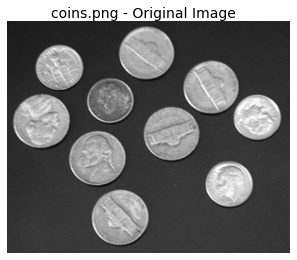

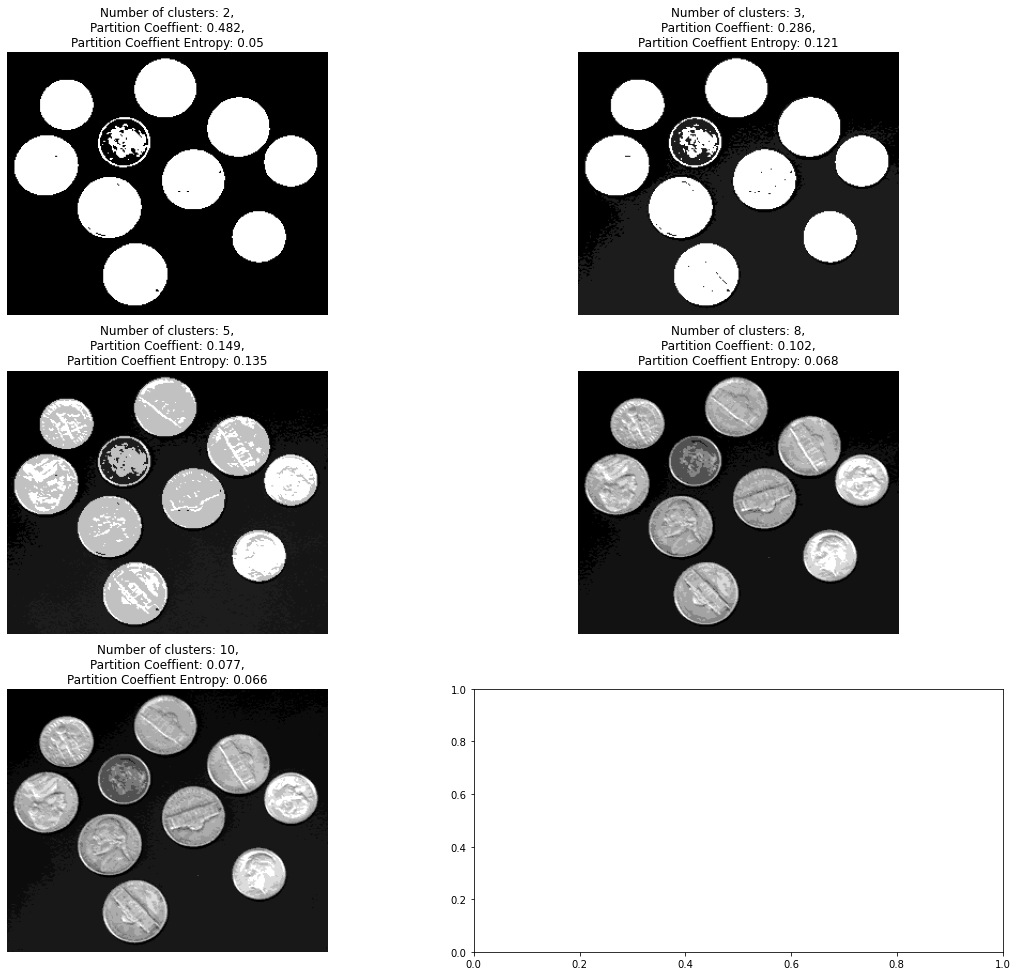

In [25]:
run_app()

#### Test Image as Colored Image

Applying Clustering for chosen different color spaces....
Finished 20.0% ...
Finished 40.0% ...
Finished 60.0% ...
Finished 80.0% ...
Finished 100.0% ...


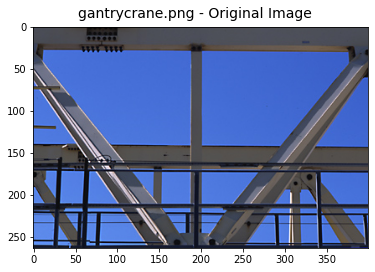

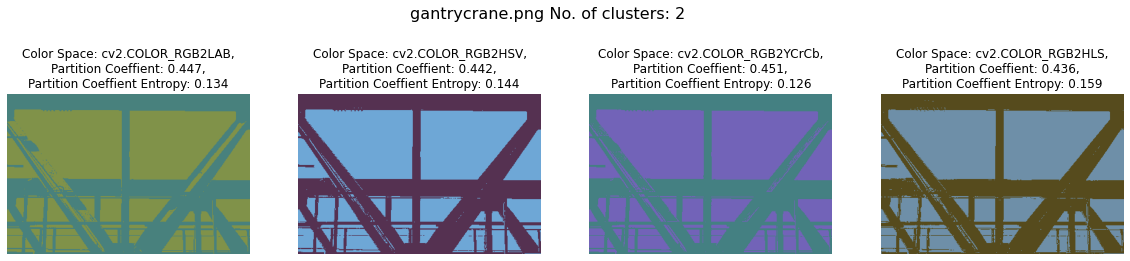

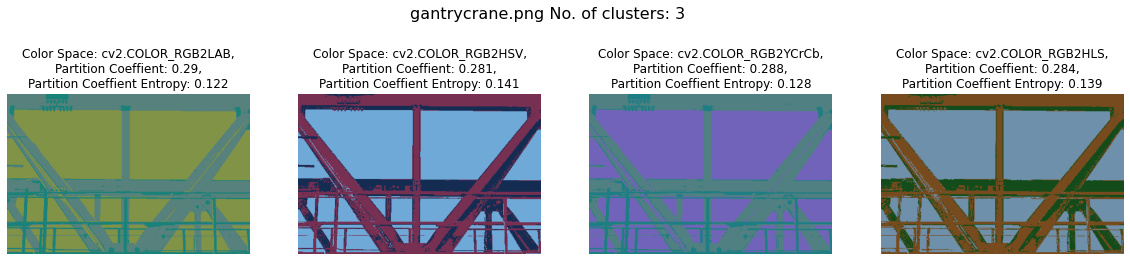

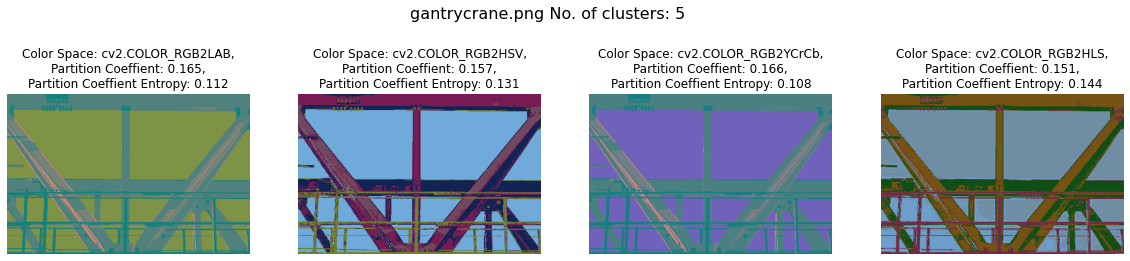

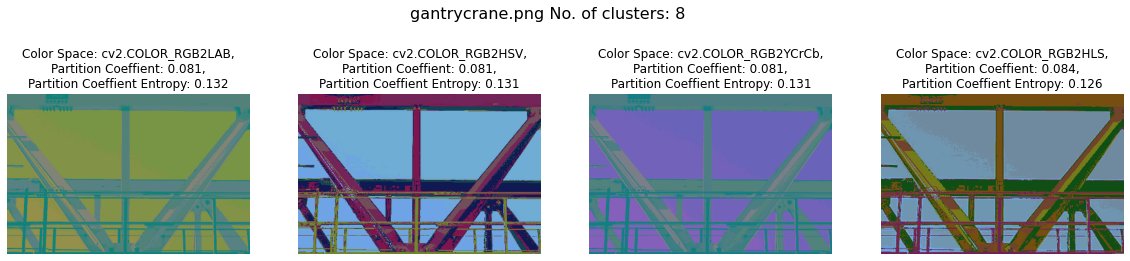

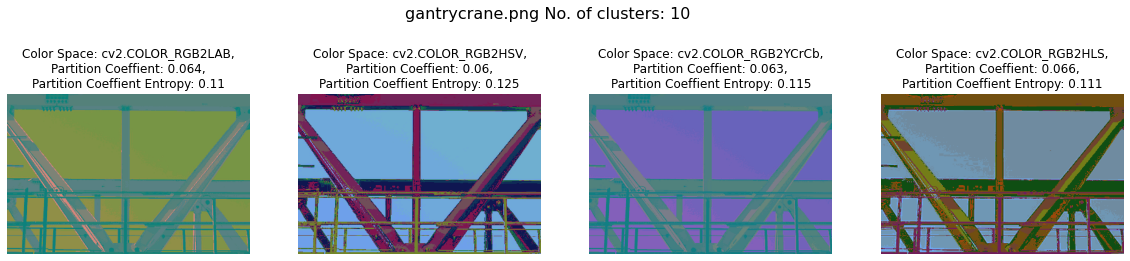



Plotting RGB Images .... 
Finished 20.0% ...
Finished 40.0% ...
Finished 60.0% ...
Finished 80.0% ...
Finished 100.0% ...


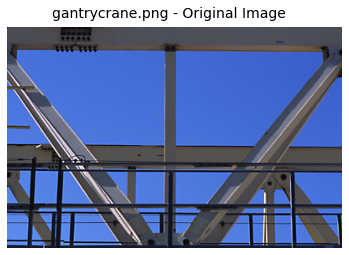

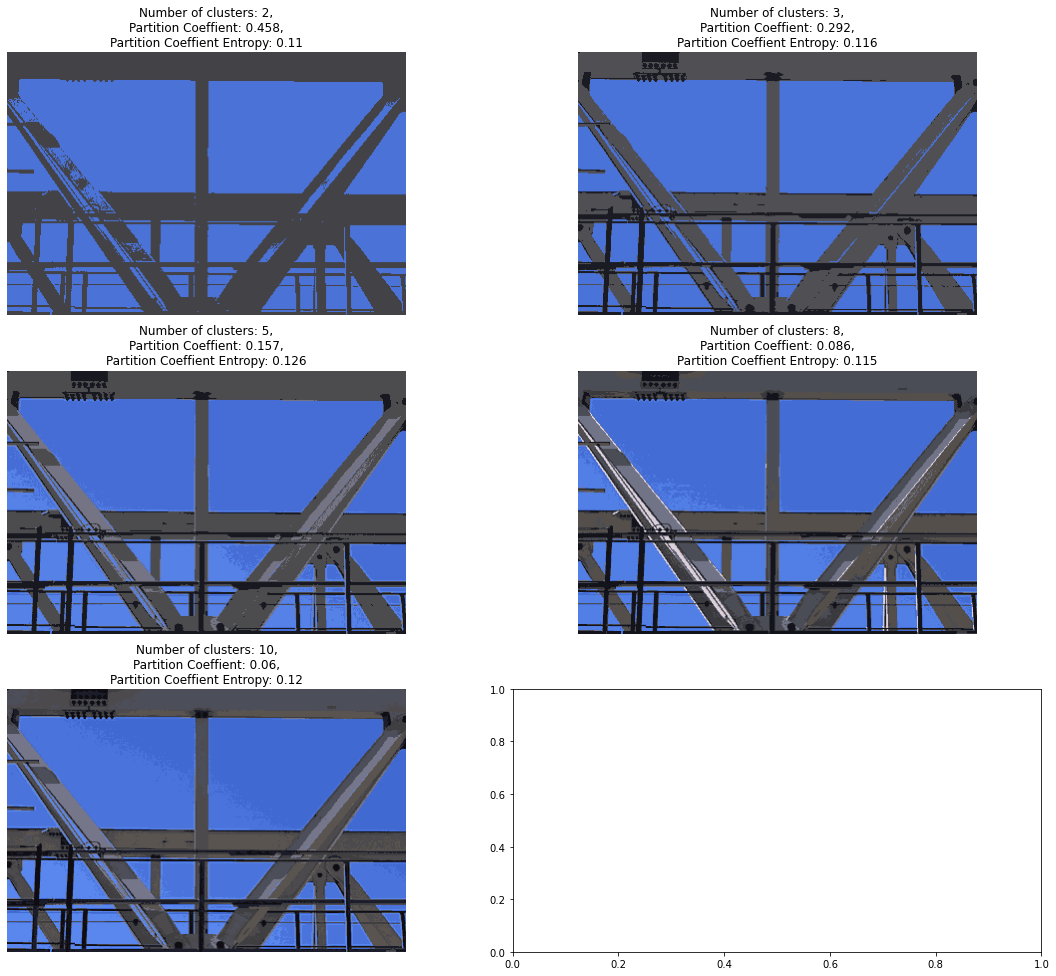

In [34]:
run_app()